<a href="https://colab.research.google.com/github/matteoalberti/Lectures_machinelearningbasics_nomath/blob/master/fromZero_toLin_Log_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## From zero to Linear and Logistic Regression 

- Data Loading

- Data Preparation

- Assumptions

- Understand the task! Supervised, Unsupervised Learning?

- Models

- Metrics and Evaluation

- Test yourself!



## Introduction to Supervised and Unsupervised Machine Learning

## Introduction to Linear and Logistic Regression Problem

***Don't worry.. this will be the only formula that we'll use today***

$y=f(x)$



### Load Packages

In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## First Exapled (GUIDED!)



### Boston house dataset

- CRIM: Per capita crime rate by town
- ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
- INDUS: Proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: Nitric oxide concentration (parts per 10 million)
- RM: Average number of rooms per dwelling
- AGE: Proportion of owner-occupied units built prior to 1940
- DIS: Weighted distances to five Boston employment centers
- RAD: Index of accessibility to radial highways
- TAX: Full-value property tax rate per 10,000$$
- PTRATIO: Pupil-teacher ratio by town
- B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
- LSTAT: Percentage of lower status of the population
- MEDV: Median value of owner-occupied homes in $1000s

In [2]:
from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [3]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# Which is the shape of our data?



In [10]:
# What about the target?

boston['MEDV'] = boston_dataset.target

### Data Preprocessing

***what should I check about my data?***


In [8]:
# There are any missing values? Look dropna function!

boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

## EDA

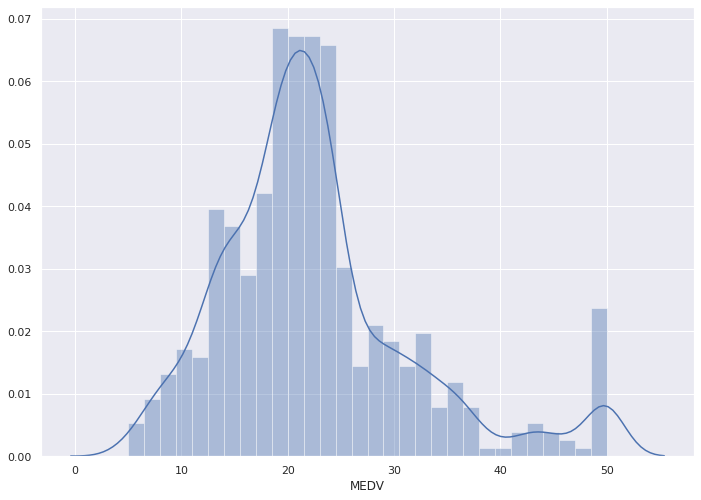

In [73]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

## Correlation Matrix

Next, we create a correlation matrix that measures the linear relationships between the variables. The correlation matrix can be formed by using the corr function from the pandas dataframe library. We will use the heatmap function from the seaborn library to plot the correlation matrix.


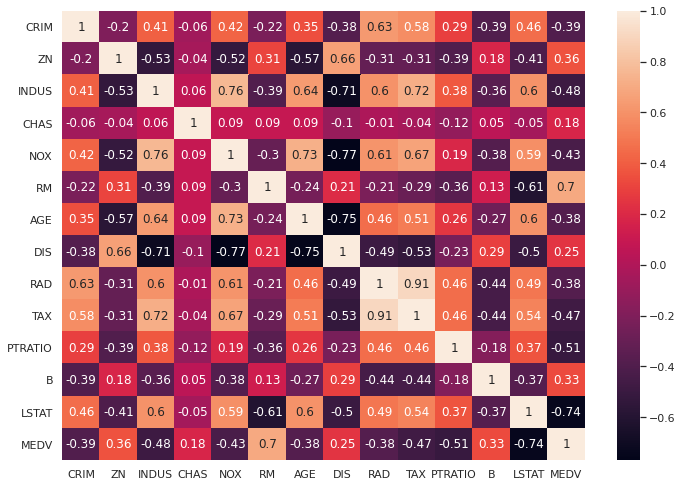

In [72]:
correlation_matrix = boston.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

*Which is the Correlation Matrix range?*

- from :
- to :


*Which features will we select?*

In [74]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Splitting

There are lots of ways to split our data and lots of packages

- Divided manually
- build-in function inside sklearn
  - train_test_val
  - . . . 


And also depend on data type / dataset size


In [61]:
import sklearn.model_selection as model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(boston[boston.columns[:-1]], boston[boston.columns[-1:]], train_size=0.65,test_size=0.35, random_state=101)


print ("Original: ", boston.shape, "\n")

print ("X_train: ", X_train.shape)
print ("y_train: ", y_train.shape)

print("X_test: ", X_test.shape)
print ("y_test: {} \n ".format(y_test.shape))

print ("Reconstruct X : ", X_train.shape[0] + X_test.shape[0])

# Check also Y

Original:  (506, 14) 

X_train:  (328, 13)
y_train:  (328, 1)
X_test:  (178, 13)
y_test: (178, 1) 
 
Reconstruct X :  506


## Model Definition & Traning

In [63]:
from sklearn.linear_model import LinearRegression

# Fitting the model
boston_model = LinearRegression()
boston_model.fit(boston[boston.columns[:-1]], boston[boston.columns[-1:]])

# Returning the R^2 for the model
boston_r2 = boston_model.score(boston[boston.columns[:-1]], boston[boston.columns[-1:]])
print('R^2: {0}'.format(boston_r2))

# Fitting the model
linear_model = LinearRegression()
linear_model.fit(linear_X, linear_y)

# Returning the R^2 for the model
linear_r2 = linear_model.score(linear_X, linear_y)
print('R^2: {0}'.format(linear_r2))

R^2: 0.7406426641094095
R^2: 0.878956585211995


## EDA and Assumptions

This assumes that there is a linear relationship between the predictors (e.g. independent variables or features) and the response variable (e.g. dependent variable or label). This also assumes that the predictors are additive.

Why it can happen: There may not just be a linear relationship among the data. Modeling is about trying to estimate a function that explains a process, and linear regression would not be a fitting estimator (pun intended) if there is no linear relationship.

What it will affect: The predictions will be extremely inaccurate because our model is underfitting. This is a serious violation that should not be ignored.

How to detect it: If there is only one predictor, this is pretty easy to test with a scatter plot. Most cases aren’t so simple, so we’ll have to modify this by using a scatter plot to see our predicted values versus the actual values (in other words, view the residuals). Ideally, the points should lie on or around a diagonal line on the scatter plot.

How to fix it: Either adding polynomial terms to some of the predictors or applying nonlinear transformations . If those do not work, try adding additional variables to help capture the relationship between the predictors and the label.

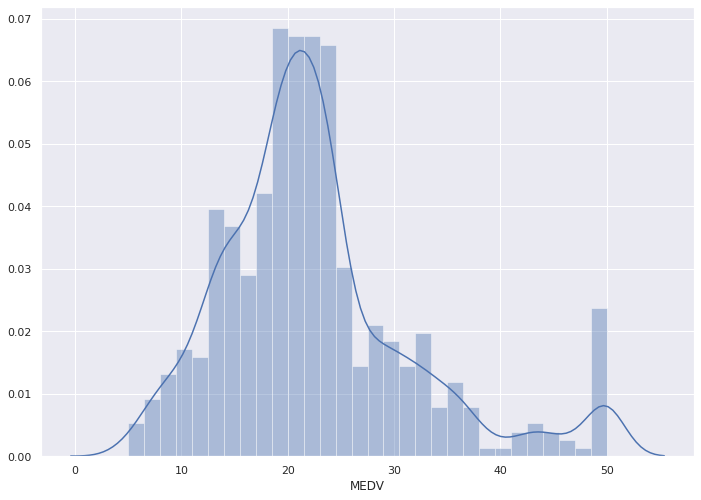

In [64]:

# What is EDA? Exploratory Data Analysis, in this case : looking for the relationship of the target variable with other features.

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()


### Normal Distribution

*What Should I see from this plot??*

- Data distribution!


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Normal Distribution')]

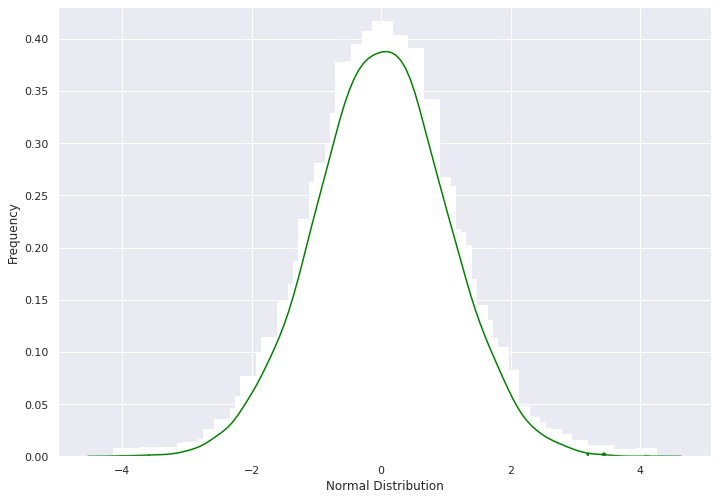

In [15]:
from scipy.stats import norm

# generate random numbers from N(0,1)
data_normal = norm.rvs(size=10000,loc=0,scale=1)

ax = sns.distplot(data_normal,
                  bins=100,
                  kde=True,
                  color='green',
                  hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Normal Distribution', ylabel='Frequency')

There are many other distributions...

*Poisson, Binomial, Trinomial, Gamma, Exponential, Bernulli, . . . .*

**But what does it mean converge into a distribution?**

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Bernoulli Distribution')]

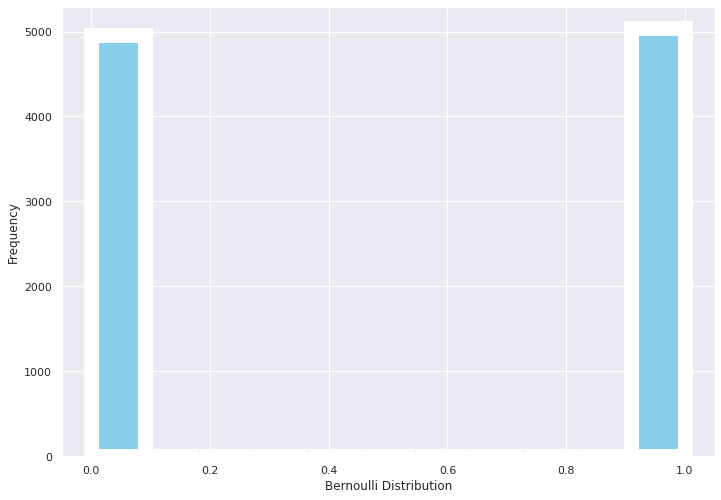

In [20]:
# Bernulli Example

# A Bernoulli distribution has only two possible outcomes, namely 1 (success) and 0 (failure)  | TESTA O CROCE!

from scipy.stats import bernoulli
data_bern = bernoulli.rvs(size=10,p=0.5)

ax= sns.distplot(data_bern,
                 kde=False,
                 color="skyblue",
                 hist_kws={"linewidth": 15,'alpha':1})

ax.set(xlabel='Bernoulli Distribution', ylabel='Frequency')



Come back to our Boston Data set!


***How can I check if normality is satisfied?***

- Graphical tests
- Shapiro Wilk test



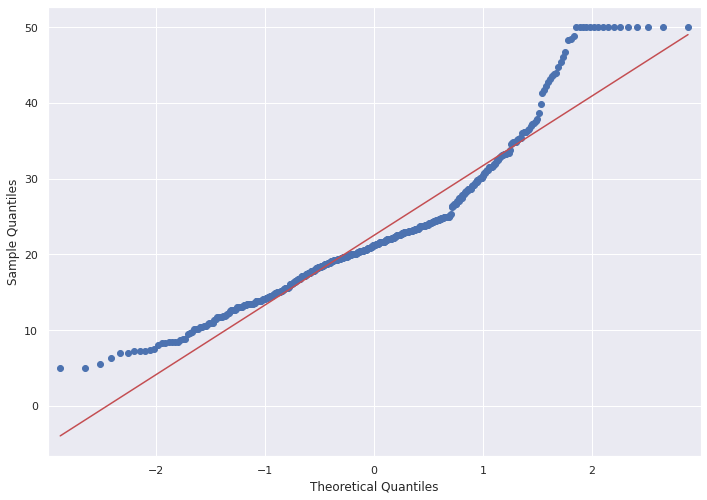

In [25]:
from statsmodels.graphics.gofplots import qqplot

qqplot(boston['MEDV'], line='s')
plt.show()

### Some EDA always is a good idea!  *We'll look later on this*


In [26]:
# Shapiro-Wilk Test

from scipy.stats import shapiro

stat, p = shapiro(boston['MEDV'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.917, p=0.000
Sample does not look Gaussian (reject H0)


In [65]:
def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    
    return df_results

def linear_assumption(model, features, label):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords,  # X and y points
             color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()



In [71]:
#linear_assumption(boston_model, boston[boston.columns[:-1]], boston[boston.columns[-1:]])

## Logistic Regression

### Variable Encoding